<a href="https://colab.research.google.com/github/hinda-mt/Predicting-Heart-Disease/blob/master/4Unsupervised_Association_Rules_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The problem analyzes the association between various items that has **the highest probability of being bought together by a customer.**

⏰ for me ⏰Association Rule Learning has the most popular applications of Machine Learning **in business and marketing strategies** to increase sales and productivity by various organizations including supermarket chains and online marketplaces.

The algorithm was first proposed in 1994 by **2 indians** Rakesh Agrawal and Ramakrishnan Srikant.

The algorithm uses a “bottom-up” approach, where frequent subsets are extended one item at once (candidate generation) and groups of candidates are tested against the data. The algorithm terminates when no further successful rules can be derived from the data.



```
Let's say you are a Machine Learning engineer working for a clothing company 
and you want to adopt new strategies  to improve the company profit .

Instructions
Use this dataset and the association rules mining to find new marketing plans . 

Note here that one of the strategies can be based on which items should be put together

dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

Bonus: try to do some visualization before applying the Apriori algorithm.

Let's do the same checkpoint but with a bigger dataset !





 ```

In [ ]:
#we are creating dataferame from a list  because dictionnaries are 'ValueError: arrays must all be same length'
import pandas as pd
import numpy as np

store_data =[['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

store_data = pd.DataFrame(store_data)
store_data.fillna('NaN', inplace=True)
store_data

,0,1,2,3,4,5,6
0,Skirt,Sneakers,Scarf,Pants,Hat,NaN,NaN
1,Sunglasses,Skirt,Sneakers,Pants,Hat,NaN,NaN
2,Dress,Sandals,Scarf,Pants,Heels,NaN,NaN
3,Dress,Necklace,Earrings,Scarf,Hat,Heels,Hat
4,Earrings,Skirt,Skirt,Scarf,Shirt,Pants,NaN


In [ ]:
import mlxtend
from mlxtend.preprocessing import TransactionEncoder

te=TransactionEncoder()
te_ary=te.fit_transform(store_data.values)    #Apply TransactionEncoder  on our dataset
store_data_1=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
store_data_1

,Dress,Earrings,Hat,Heels,NaN,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,True,False,True,False,True,False,True,True,False
1,False,False,True,False,True,False,True,False,False,False,True,True,True
2,True,False,False,True,True,False,True,True,True,False,False,False,False
3,True,True,True,True,False,True,False,False,True,False,False,False,False
4,False,True,False,False,True,False,True,False,True,True,True,False,False


In [ ]:
store_data_1.drop(['NaN'],inplace=True,axis=1)

In [ ]:
store_data_1

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [ ]:
store_data_1.sum()

Dress         2
Earrings      2
Hat           3
Heels         2
Necklace      1
Pants         4
Sandals       1
Scarf         4
Shirt         1
Skirt         3
Sneakers      2
Sunglasses    1
dtype: int64

Text(0.5, 0, 'NUMBER OF ITEMS FREEQUENTLY SOLD ')

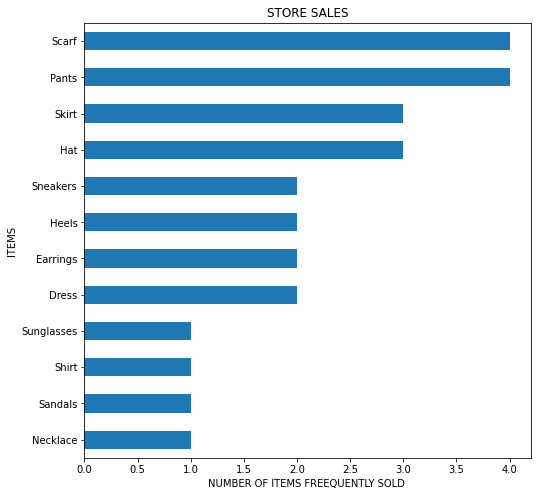

In [ ]:
import matplotlib.pyplot as plt

store_data_1.sum().sort_values().plot(kind='barh',figsize= (8,8) )
plt.title('STORE SALES')
plt.ylabel('ITEMS') 
plt.xlabel('NUMBER OF ITEMS FREEQUENTLY SOLD ') 


**interpretation:**

based on the BAR graph the most sold items are Scarf, Pants ,skirts and hats.

NB : EACH ITEM SEPERATELY

⏰ for me ⏰:
For example, the association rule, {onions, chicken masala} => {chicken} says that a person who has got both onions and chicken masala in his or her basket has a high probability of buying chicken also.







info 1 :

⏰ for me ⏰
Support:
The support of item I is defined as the ratio between the number of transactions containing the item I ( could be a set of items) by the total number of transactions expressed as :

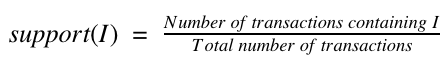

When the percentage values of support and confidence is given For an example when support and confidence is given as 60% and 60% respectively what is the minimum support?
These parameters are used to exclude rules in the result that have a support or a confidence lower than the minimum support and minimum confidence respectively.


instruction 1 :


In [ ]:
#resetting min_support=0.6 : 60% 
from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(store_data_1, min_support=0.6, use_colnames=True) 
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Skirt, Pants)"


interpretation 1 :    

1.first info we get after setting  min_support=0.6 form this table is that this algorithm has selected the most frequently BOUGHT 4 items.

2.second info support of these two 
 
 from the output support : 

0.8	(Pants) : 80%

0.8	(Scarf) : 80%

0.6 (Pants, Scarf) : 60% both

0.6 (Pants, Skirt): 60% both

assumption  1 : This implies that if a person has bought pants he or she is 100% likely to buy scarf or also he or she is 100% likely to buy skirt . we don't know the exactitude of this assumption
 untill we check lift ?


info 2 : 

Confidence: ⏰ for me ⏰
This is measured by the proportion of transactions with item I1, in which item I2 also appears. The confidence between two items I1 and I2,  in a transaction is defined as the total number of transactions containing both items I1 and I2 divided by the total number of transactions containing I1.
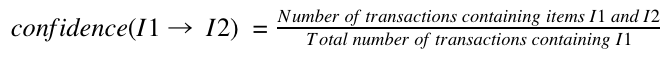







In [ ]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.9) # associate items WITH min_threshold=0.9

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


Once we execute the above code block, the algorithm returns 1 rule based on the set parameters of confidence :
This implies that if a person has bought pants,he or she is 100% likely to buy skirt .
 untill we check lift ?

#test phase 
**Setting the min_threshold=0.9  we have here the frequent items bought(selected)  together** .

(Skirt)	(Pants) WITH SUPPORT OF 0.6 CONFIDENCE OF 1 AND LIFT OF 1.25

wich is translated to that if a person has bought SKIRT he or she is 100% likely to buy PANTS .

In [ ]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7) # reseting min_threshold=0.7

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6


⏰ for me ⏰

  **The support and confidence** are measures to measure how interesting a rule is.


**The minimum support and minimum confidence** are set by the usersThese parameters are used to exclude rules in the result that have a support or a confidence lower than the minimum support and minimum confidence







interpretation 2: 

**again we have here the frequent items bought together**

Couples : (pants , scarf),(pants,skirt).

based on lift:

This implies that if a person has bought pants he or she is not likely to buy scarf (LIFT=0.9, ALthough (confidence=0.75: 75% THEY COULD BE BOUGHT TOGETHER 
)) but  IF he or she has bought pants he or she is 100% likely to buy sKIRT ( confidence=1)  .
https://www.examplefiles.net/cs/864814

**rule 1 is correct**

SEARCH : leverage	and conviction

info 3 : 

Lift: ⏰ for me ⏰
Lift is the ratio between the confidence and support expressed as :

where : 

min_support: The minimum support of relations (float)

min_confidence: The minimum confidence of relations (float)

min_lift: The minimum lift of relations (float)

min_length: The minimum number of items in a rule

max_length: The maximum number of items in a rule


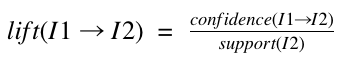


In [ ]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="lift",min_threshold=1.20) # 1.25 GAVE US the perfect respond about our first rule which is correct

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.25,0.12,inf
1,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.25,0.12,1.6


interpretation: 

lift = 1.20 >1 then rule one  is correct ,oviously this rule is set for women
as a marketing stategy : if a woman buys  (Pants)	she will 100% BUY A SKIRT with it. but no , i think it's  not truly  correct 

instruction 2 :

In [ ]:
import pandas as pd


mr_data=pd.read_csv('Market_Basket_Optimisation.csv', sep=',')

mr_data.fillna('NaN', inplace=True)

mr_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mr_data.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19],
           dtype='int64')

we have the problem of missing values for the majority of the columns

In [ ]:
#sales frequency graph for testing  which item is saled more frequently or the most saled
#but why by normal plotting it didn't happen
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te=TransactionEncoder()
te_ary=te.fit(mr_data.values).transform(mr_data.values)    #Apply TransactionEncoder  on our dataset
market_data_1=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
market_data_1


,asparagus,NaN,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [ ]:
market_data_1.drop(['NaN'], axis=1,inplace=True)

In [ ]:
#method 1

market_data_1.sum().sort_values(ascending=False)

mineral water    1788
eggs             1348
spaghetti        1306
french fries     1282
chocolate        1229
                 ... 
bramble            14
cream               7
napkins             5
water spray         3
 asparagus          1
Length: 120, dtype: int64

mineral water, eggs and spaghetti are the most sold items for this market .

Text(0.5, 1.0, 'MARKET SALES')

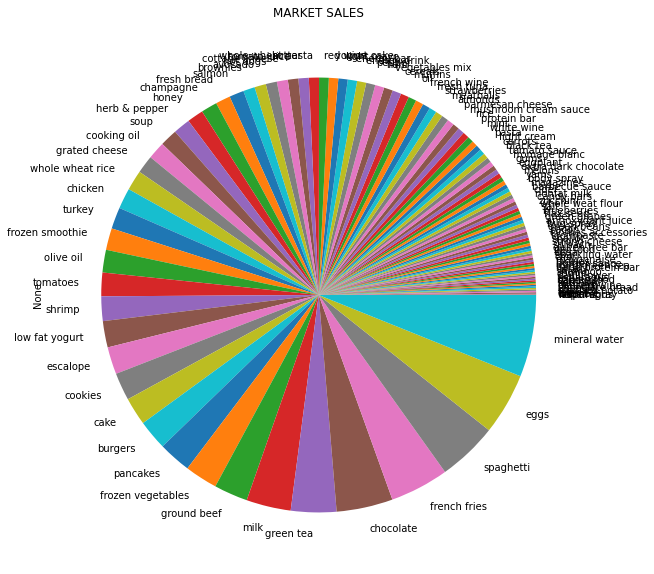

In [ ]:
market_data_1.sum().sort_values().plot(kind='pie',figsize=(10,10))
#let's try with mca
plt.title('MARKET SALES')
#THE BAR CHART IS TOO ANNOYING FOR THE EYES  SO I CHOOSE PIE TO JUST SEE THE largest slice 

miniral water,eggs, spaghetti , french fries and choclate are the most sold item but we need to reduce our data using MCA so we could visualize a much better graph

In [ ]:
pip install prince

In [ ]:
import prince
mca = prince.MCA(n_components=2, n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
mca = mca.fit(market_data_1)
mca

MCA(n_iter=3, random_state=42)

ZeroDivisionError: ignored

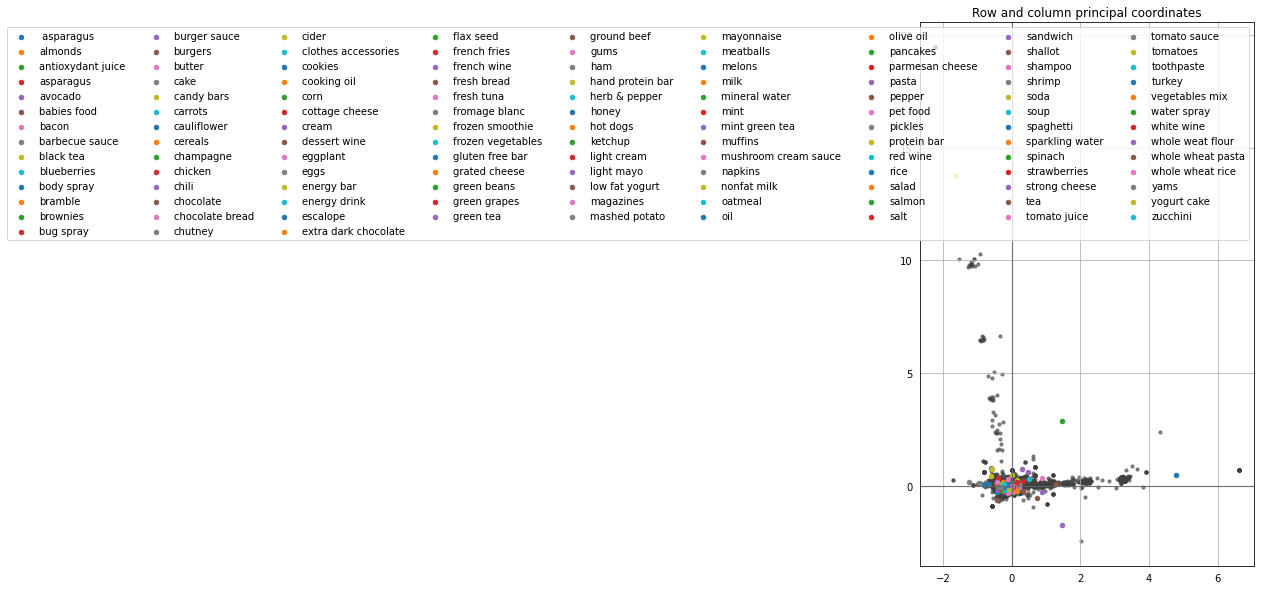

In [ ]:
ax = mca.plot_coordinates( 
X=market_data_1,
ax=None,
figsize=(6, 10),
show_row_points=True,
row_points_size=10,
show_row_labels=False,
show_column_points=True,
column_points_size=20,
show_column_labels=False,
legend_n_cols=9)
#WHY ?
#IS THERE ANOTHER GRAPH

⏰ for me ⏰  : other source : https://rpkgs.datanovia.com/factoextra/

fpgrowth algorithm  is almost 5x times faster than the original apriori for large datasets.



source : https://journalofbigdata.springeropen.com/articles/10.1186/s40537-021-00538-3

⏰ for me ⏰ this algorithm is used to identify interesting relationships between sets of items in a dataset and predict associative behavior for new data.

In this step, **a threshold** is used to eliminate items excluded in the frequent itemset which is also known as the minimum support.
 **the threshold** provides an important role in determining the number of rules generated. However, setting the wrong threshold leads to the failure of the association rule mining to obtain rules.
 **exp** :The Minimum Support Count would be count of transactions, so it would be 60% of the total number of transactions. If the number of transactions is 5, your minimum support count would be 5*60/100 = 3.

 The value of **minimum support** in the adaptive support model is determined based on the average and total number of items in each transaction, as well as their support values.
 formula : The minimum support value in the proposed method is obtained from the average utility value divided by the total existing transactions

I chose a random value of min support 0.2 only mineral water was selected

In [ ]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(market_data_1, min_support=0.009, use_colnames=True) #when our minimum support is 0.09 the frequent_itemsets are shown below

frequent_itemsets
#formule = 10trasaction *7week /number of all transaction 7501 knowing that we have so much nan 

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.009199,(blueberries)
...,...,...
302,0.017064,"(ground beef, spaghetti, mineral water)"
303,0.015731,"(milk, spaghetti, mineral water)"
304,0.010265,"(spaghetti, mineral water, olive oil)"
305,0.011465,"(spaghetti, pancakes, mineral water)"


INTERPRETATION :
 
 *nbr of transaction : 307 where we can find 1 item or a set of items with a min_support of 0.9% 






**when minimum support is 0.09 (9%) the frequent_itemsets are shown below**

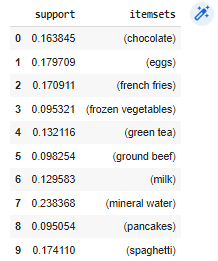

interpretation :    

1.first info we get after setting  min_support=0.1 from this table is that this algorithm has selected 7  frequent items bought together . 

2.second info support 
 mineral water ---> 0.2 > min support  10%

mineral water has the biggest sells 

SOURCE / https://www.softwaretestinghelp.com/apriori-algorithm/

Sample transaction sparse matrix?

In [ ]:
#from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)
rules 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
1,(olive oil),(mineral water),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962
2,(salmon),(mineral water),0.042528,0.238368,0.017064,0.401254,1.683336,0.006927,1.272045
3,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255
4,"(burgers, french fries)",(eggs),0.021997,0.179709,0.009065,0.412121,2.293265,0.005112,1.395340
5,"(chocolate, eggs)",(mineral water),0.033196,0.238368,0.013465,0.405622,1.701663,0.005552,1.281394
6,"(chocolate, frozen vegetables)",(mineral water),0.022930,0.238368,0.009732,0.424419,1.780517,0.004266,1.323239
7,"(chocolate, ground beef)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937
8,"(chocolate, milk)",(mineral water),0.032129,0.238368,0.013998,0.435685,1.827780,0.006340,1.349656
9,"(chocolate, pancakes)",(mineral water),0.019864,0.238368,0.009332,0.469799,1.970895,0.004597,1.436495


INTERPRETATION 

FOR 40% confidence , we can see that the first rule !

**rule1** 

in every items bought together the majority contains (mineral water) 

is this rule  really correct ? 


In [ ]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="lift",min_threshold=2.9)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410
1,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860
2,"(spaghetti, mineral water)",(ground beef),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445
3,(ground beef),"(spaghetti, mineral water)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902


In [ ]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="lift",min_threshold=2.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410
1,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860
2,"(eggs, french fries)",(burgers),0.036395,0.087188,0.009065,0.249084,2.856852,0.005892,1.215598
3,(burgers),"(eggs, french fries)",0.087188,0.036395,0.009065,0.103976,2.856852,0.005892,1.075422
4,"(spaghetti, milk)",(ground beef),0.035462,0.098254,0.009732,0.274436,2.793141,0.006248,1.242822
5,(ground beef),"(spaghetti, milk)",0.098254,0.035462,0.009732,0.099050,2.793141,0.006248,1.070579
6,"(spaghetti, mineral water)",(ground beef),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445
7,(ground beef),"(spaghetti, mineral water)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902


INTERPRETATION :

HICHEM I chose randomly the min_theshhold "for confidence and lift" .

based on setting  min_support  and GETTING THE best Comprehensible output . is there another way ? cs there are alot of items here not like the first dataset  YOU CAN't SEE by eye the probability here.

FOR LIFT > 1 
 (herb & pepper)and (ground beef)	--> lift :3.29	 and confidence : 0.323450 
 
**rule2:**

customer who buyS ground beef is 100% likely to buy herb and pepper.

(spaghetti, mineral water) and (ground beef)	--> lift :2.90	 and confidence : 0.28
 
 **rule3:**

customer who buyS ground beef is 100% likely to buy (spaghetti, mineral water).

((eggs, french fries)	AND (burgers)	--> lift :2.85	 and confidence : 0.24

**RULE4:**    

customer who buyS burgers is 100% likely to buy (eggs, french fries).

(spaghetti, milk) and	(ground beef)--> lift :2.79 and confidence : 0.27

**RULE5:** 

customer who buyS (ground beef)- is 100% likely to buy (eggs, french fries) or (spaghetti, milk)



つづく....




